In [1]:
import json
import pandas as pd
import requests
import numpy

### This project trends the monthly traffic for English Wilikpidea from Jan 1 2008 to Aug 30 2019. Data is collected from the two API endpoints one for data till July 2016 and the other for data from July 2015.

#### This data is obtained from the wikipedia published API's  

In [2]:
##getting the data from the api
endpoint_legacy = 'https://wikimedia.org/api/rest_v1/metrics/legacy/pagecounts/aggregate/{project}/{access-site}/{granularity}/{start}/{end}'

endpoint_pageviews = 'https://wikimedia.org/api/rest_v1/metrics/pageviews/aggregate/{project}/{access}/{agent}/{granularity}/{start}/{end}'

In [11]:
#checking the various inputs of the API call
endpoint_legacy


'https://wikimedia.org/api/rest_v1/metrics/legacy/pagecounts/aggregate/{project}/{access-site}/{granularity}/{start}/{end}'

#### In the below section we extract the data from the API both legacy and the current view, to get data by each of the access types

In [27]:
#parameters for getting aggregated current standard pageview data 
# see: https://wikimedia.org/api/rest_v1/#!/Pageviews_data/get_metrics_pageviews_aggregate_project_access_agent_granularity_start_end
mobile_web_params_pageviews = {"project" : "en.wikipedia.org",
                    "access" : "mobile-web",
                    "agent" : "user",
                    "granularity" : "monthly",
                    "start" : "2015070100",
                    # for end use 1st day of month following final month of data
                    "end" : '2019100100'
                        }
# Parameters for getting aggregated legacy view data 
# see: https://wikimedia.org/api/rest_v1/#!/Legacy_data/get_metrics_legacy_pagecounts_aggregate_project_access_site_granularity_start_end
mobile_site_params_legacy = {"project" : "en.wikipedia.org",
                 "access-site" : "mobile-site",
                 "granularity" : "monthly",
                 "start" : "2007120100",
                # for end use 1st day of month following final month of data
                 "end" : "2016080100"
                    }
mobile_app_params_pageviews = {"project" : "en.wikipedia.org",
                    "access" : "mobile-app",
                    "agent" : "user",
                    "granularity" : "monthly",
                    "start" : "2015070100",
                    # for end use 1st day of month following final month of data
                    "end" : '2019100100'
                        }
    
desktop_site_params_legacy = {"project" : "en.wikipedia.org",
                 "access-site" : "desktop-site",
                 "granularity" : "monthly",
                 "start" : "2007120100",
                # for end use 1st day of month following final month of data
                 "end" : "2016080100"
                    }


desktop_params_pageviews = {"project" : "en.wikipedia.org",
                    "access" : "desktop",
                    "agent" : "user",
                    "granularity" : "monthly",
                    "start" : "2015070100",
                    # for end use 1st day of month following final month of data
                    "end" : '2019100100'
                        }

In [29]:
## The below code double confirms that the input parameters are accurtely set 
print(mobile_web_params_pageviews)
print(mobile_site_params_legacy)
print(mobile_app_params_pageviews)
print(desktop_site_params_legacy)
print(desktop_params_pageviews)

{'project': 'en.wikipedia.org', 'access': 'mobile-web', 'agent': 'user', 'granularity': 'monthly', 'start': '2015070100', 'end': '2019100100'}
{'project': 'en.wikipedia.org', 'access-site': 'mobile-site', 'granularity': 'monthly', 'start': '2007120100', 'end': '2016080100'}
{'project': 'en.wikipedia.org', 'access': 'mobile-app', 'agent': 'user', 'granularity': 'monthly', 'start': '2015070100', 'end': '2019100100'}
{'project': 'en.wikipedia.org', 'access-site': 'desktop-site', 'granularity': 'monthly', 'start': '2007120100', 'end': '2016080100'}
{'project': 'en.wikipedia.org', 'access': 'desktop', 'agent': 'user', 'granularity': 'monthly', 'start': '2015070100', 'end': '2019100100'}


In [15]:
##This defines the function to access the api call. this part of the code was picked from the examples which were provided.
def api_call(endpoint,parameters):
    call = requests.get(endpoint.format(**parameters))
    response = call.json()
    
    return response

 In the below section, we extract the data from the API for each of the access types. The data is extracted into a Jason file.

In [30]:
pageviews_mobile_web_201507_201909= api_call(endpoint_pageviews, mobile_web_params_pageviews)
pageviews_mobile_app_201507_201909= api_call(endpoint_pageviews, mobile_app_params_pageviews)
pageviews_desktop_201507_201909= api_call(endpoint_pageviews, desktop_params_pageviews)
pagecounts_mobile_site_200712_201607= api_call(endpoint_legacy, mobile_site_params_legacy)
pagecounts_desktop_site_200712_201607= api_call(endpoint_legacy, desktop_site_params_legacy)


 In the below section I create a Jason file for each of the types of access 

In [50]:
with open('pageviews_mobile-web_201507_201909.json', 'w') as f:
    json.dump(pageviews_mobile_web_201507_201909, f)
with open('pageviews_mobile-app_201507_201909.json', 'w') as f:
    json.dump(pageviews_mobile_app_201507_201909, f)
with open('pageviews_desktop_201507_201909.json', 'w') as f:
    json.dump(pageviews_desktop_201507_201909, f)
with open('pagecounts_mobile-site_200712_201607.json', 'w') as f:
    json.dump(pagecounts_mobile_site_200712_201607, f)
with open('pagecounts_desktop-site_200712_201607.json', 'w') as f:
    json.dump(pagecounts_desktop_site_200712_201607, f)

The first task was to merge the mobile in the current API which is available as Mobile-web and Mobile-app into a single data set. Below steps achieve that.

In [63]:
## I tool help from a friend to hep me understand write this part of the cod and have leverage stackoverflow for clarifying some of the questions I had.
import csv
csv_data = open("mobile.csv", 'w')
csvwriter= csv.writer(csv_data)

with open("pageviews_mobile-web_201507_201909.json") as f:
    mparsed = json.load(f)
    mobile = mparsed['items']
    count = 0
    for item in mobile:
        if count == 0:
            header = item.keys()
            csvwriter.writerow(header)
            count += 1
        csvwriter.writerow(item.values())
with open("pageviews_mobile-app_201507_201909.json") as f:
    wparsed = json.load(f)
    mobile = wparsed['items']
    for item in mobile:
        csvwriter.writerow(item.values())
csv_data.close()

 Start off by reading the CSV file and then extract the month and year data; there by group the data by access, Year and month and sum across these dimensions.

In [77]:
mobile = pd.read_csv('mobile.csv')
    

In [125]:
mobile['Year'] = mobile['timestamp'].astype(str).str[:4]

In [129]:
mobile['Month'] = mobile['timestamp'].astype(str).str[4:6]

In [131]:
mobile['access'] = mobile['access'].map({'mobile-web':'mobile', 'mobile-app': 'mobile'})

In [135]:
mobiledata = mobile[['access', 'Year', 'Month', 'views']]

In [137]:
mobiledata = mobiledata.groupby(['access', 'Year', 'Month'])[['views']].sum()

In [140]:
mobiledata = mobiledata.reset_index()


In the remaining three sections i do the same as above but for each of the remaining files so that I end up with 3 more data frames each one seperately for the data types

In [192]:
import csv
csv_data = open("legm.csv", 'w')
csvwriter= csv.writer(csv_data)

with open("pagecounts_mobile-site_200712_201607.json") as f:
    mparsed = json.load(f)
    legm = mparsed['items']
    count = 0
    for item in legm:
        if count == 0:
            header = item.keys()
            csvwriter.writerow(header)
            count += 1
        csvwriter.writerow(item.values())
        
     
csv_data.close()

In [207]:
legm = pd.read_csv('legm.csv')
legm['Year'] = legm['timestamp'].astype(str).str[:4]
legm['Month'] = legm['timestamp'].astype(str).str[4:6]

In [200]:
csv_data = open("legd.csv", 'w')
csvwriter= csv.writer(csv_data)

with open("pagecounts_desktop-site_200712_201607.json") as f:
    mparsed = json.load(f)
    legm = mparsed['items']
    count = 0
    for item in legm:
        if count == 0:
            header = item.keys()
            csvwriter.writerow(header)
            count += 1
        csvwriter.writerow(item.values())
csv_data.close()

In [201]:
legd = pd.read_csv('legd.csv')
legd['Year'] = legd['timestamp'].astype(str).str[:4]
legd['Month'] = legd['timestamp'].astype(str).str[4:6]

In [171]:
import csv
csv_data = open("AllD.csv", 'w')
csvwriter= csv.writer(csv_data)

with open("pageviews_desktop_201507_201909.json") as f:
    mparsed = json.load(f)
    AllD = mparsed['items']
    count = 0
    for item in AllD:
        if count == 0:
            header = item.keys()
            csvwriter.writerow(header)
            count += 1
        csvwriter.writerow(item.values())
csv_data.close()


In [172]:
AllD = pd.read_csv('AllD.csv')

In [175]:
AllD['Year'] = AllD['timestamp'].astype(str).str[:4]


In [176]:
AllD['Month'] = AllD['timestamp'].astype(str).str[4:6]

Once I have these four files, i needed to create a look up file where I have year and month as the index and have the counts across both pageviews and pagecounts across the acess types. I was not able to make progress fast enough in this section through python, hence i dumped the data frames into a CSV and manipulated in excel.

 What I did in excel was creating a new file and taking all the dates from 2007-12 to 2019-09; then picking the counts for each of the accesstypes and mapping them to appropriate cells. I also appended "0" when no data was present. With this I finally ended up with the e-wipedia_traffic_200712-201909.csv. I imported that file to make sure that everything looks well

In [209]:
AllD.to_csv('AllD.csv', sep='\t', encoding='utf-8')
mobiledata.to_csv('mobiledata.csv', sep='\t', encoding='utf-8')
legm.to_csv('legm.csv', sep='\t', encoding='utf-8')
legd.to_csv('legd.csv', sep='\t', encoding='utf-8')



In [211]:
Final = pd.read_csv('en-wikipedia_traffic_200712-201909.csv')

In [213]:
Final.head()

,Year,Month,pagecount_all_views,pagecount_desktop_views,pagecount_mobile_views,pageview_all_views,pageview_desktop_views,pageview_mobile_views
0,2007,12,2998331524,2998331524,0,0,0,0
1,2008,1,4930902570,4930902570,0,0,0,0
2,2008,2,4818393763,4818393763,0,0,0,0
3,2008,3,4955405809,4955405809,0,0,0,0
4,2008,4,5159162183,5159162183,0,0,0,0


 I also used excel for graphing the chart as it was easier to graph it using excel. Below is the image from excel. I am also uploading the excel file i used for generating the graph

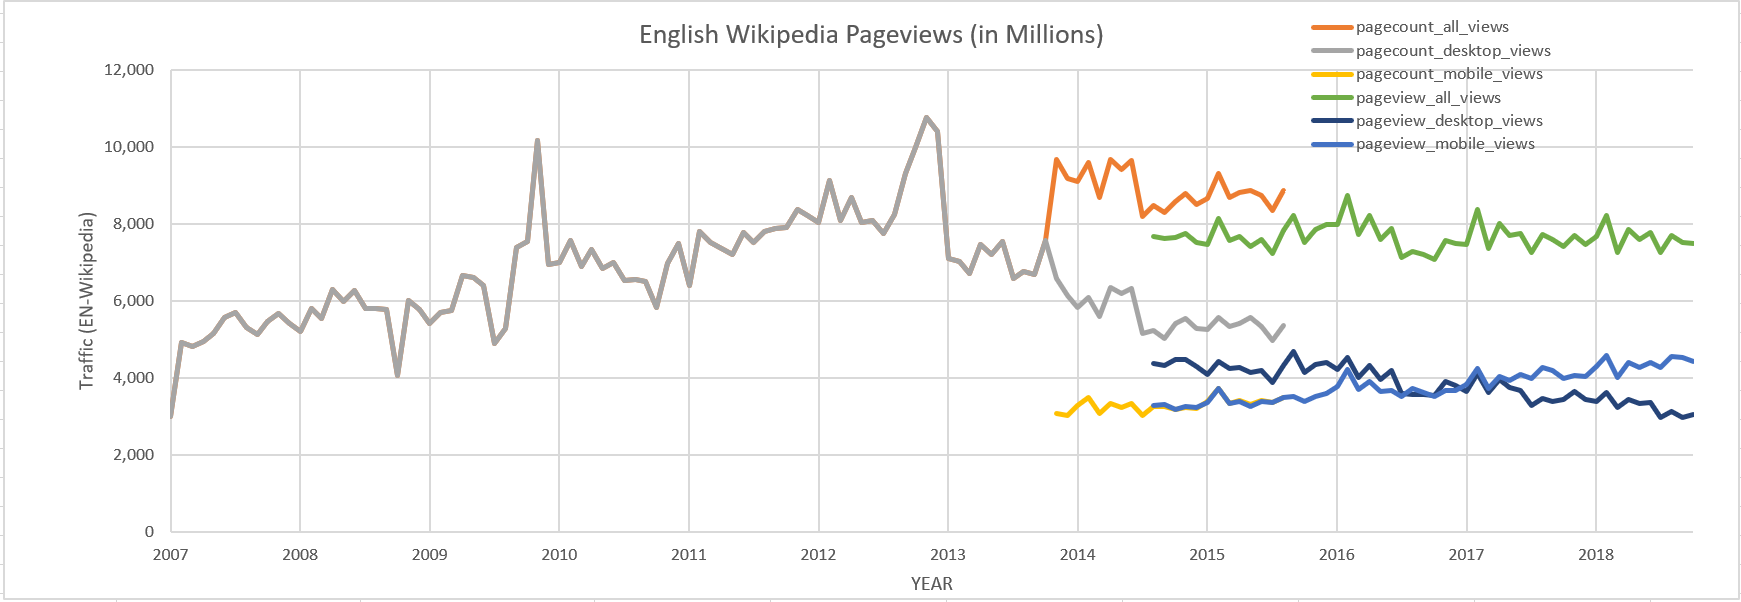

In [226]:
from PIL import Image
display(Image.open("Graph.png"))

The above graph captures the trend of english wikipedia monthly vists. There has been a steady growth in visits which peaked during 2012 fall season. There is a dip in visits from 2012 start, though the reason for that could be because they may not have been measuring web visits. Once the web visits were also captured then the total visits go up. While post 2015 the decktop page views have gradually started declining as well while the mobile pageviews increase for a constant overall pageviews